In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from __future__ import division   

In [3]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [4]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = (x//2) - cropx//2
    starty = (y//2) - cropy//2    
    return img[starty:starty+cropy, startx:startx+cropx]

## Uses Summation Method

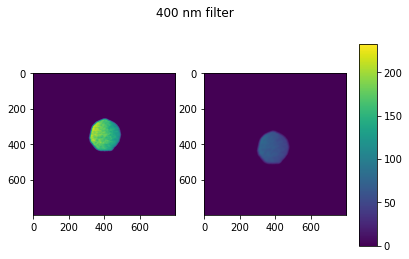

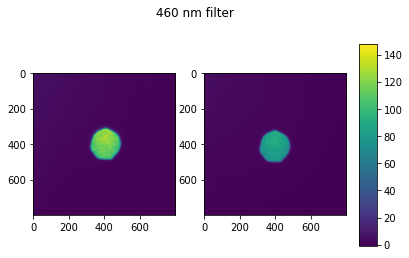

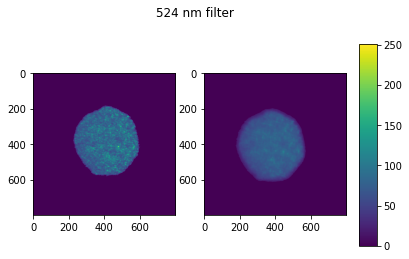

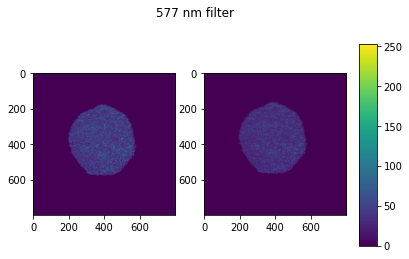

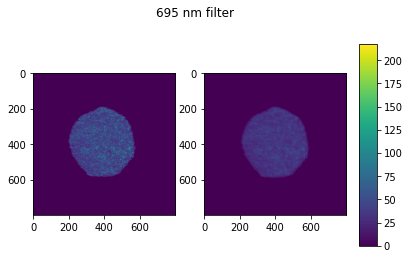

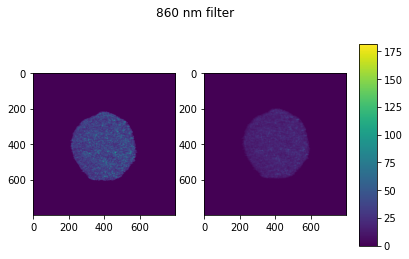

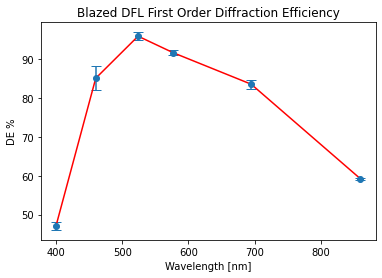

In [9]:
cwl = [400,460,524,577,695,860]
trans = []
T_std = []

T_micro = [0.85,0.91,0.94,0.91,0.89,0.85]
T_NOA = [0.95,0.95,0.96,0.96,0.96,0.97]

for i in range(len(cwl)):
    
    doe4std = []
    nodoe4std = []
    trans_3 = []
    
    for j in range(3):
        img_noDOE = crop_center(img.imread(f'trans_raw_data/cropped_{cwl[i]}n{j+1}.bmp'),800,800)
        img_DOE = crop_center(img.imread(f'trans_raw_data/cropped_{cwl[i]}d{j+1}.bmp'),800,800)

        NDsub = np.where(img_noDOE >= np.std(img_noDOE),0,img_noDOE)
        Dsub = np.where(img_noDOE >= np.std(img_noDOE),0,img_DOE)

        NDsub_sum = np.sum(NDsub)
        Dsub_sum = np.sum(Dsub)
        NDsub_denom = len(np.where(NDsub!=0)[0])
        Dsub_denom = len(np.where(Dsub!=0)[0])

        ND_avg_sub = NDsub_sum/NDsub_denom
        D_avg_sub = Dsub_sum/Dsub_denom
        
        
        NDcoords = np.where(img_noDOE <= np.std(img_noDOE),0,img_noDOE-ND_avg_sub)
        Dcoords = np.where(img_DOE <= np.std(img_DOE),0,img_DOE-D_avg_sub)
        
        
        img_noDOE = NDcoords
        img_DOE = Dcoords
        DOE_sum = np.sum(img_DOE)
        doe4std.append(DOE_sum)
        noDOE_sum = np.sum(img_noDOE)
        nodoe4std.append(noDOE_sum)
        T = DOE_sum / noDOE_sum *100/(T_micro[i]*T_NOA[i]) # find median transmission
        trans_3.append(T)
        
    trans.append(np.average(trans_3))
    T_std.append(np.sqrt((np.std(doe4std)/np.average(doe4std))**2+(np.std(nodoe4std)/np.average(nodoe4std))**2)*np.average(trans_3))
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    minmin = np.min([np.min(img_noDOE), np.min(img_DOE)])
    maxmax = np.max([np.max(img_noDOE), np.max(img_DOE)])
    
    im1 = axes[0].imshow(img_noDOE, vmin=minmin, vmax=maxmax,
                    cmap='viridis')
    im2 = axes[1].imshow(img_DOE, vmin=minmin, vmax=maxmax,
                    cmap='viridis')
    fig.suptitle(f'{cwl[i]} nm filter')
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im2, cax=cbar_ax)
    plt.show()


plt.errorbar(cwl,trans, yerr = T_std,fmt = 'o', capsize = 5)
trans_av = movingaverage(trans, 1)
plt.plot(cwl, trans_av,"r")
plt.title('Blazed DFL First Order Diffraction Efficiency')
plt.ylabel('DE %')
plt.xlabel('Wavelength [nm]')
plt.show()

In [10]:
for i in range(len(trans)):
    print(f'The efficiency for the {cwl[i]} nm filter is: \n{trans[i]} %')
    
for i in range(len(trans)):
    print(f'The measurement error in efficiency for the {cwl[i]} nm filter is: {T_std[i]} %')

The efficiency for the 400 nm filter is: 
47.13579502965376 %
The efficiency for the 460 nm filter is: 
85.1093005282584 %
The efficiency for the 524 nm filter is: 
95.93860531043326 %
The efficiency for the 577 nm filter is: 
91.68504729731602 %
The efficiency for the 695 nm filter is: 
83.56839901356535 %
The efficiency for the 860 nm filter is: 
59.22931860275062 %
The measurement error in efficiency for the 400 nm filter is: 1.073285278490612 %
The measurement error in efficiency for the 460 nm filter is: 3.046523944546262 %
The measurement error in efficiency for the 524 nm filter is: 1.0124506178868782 %
The measurement error in efficiency for the 577 nm filter is: 0.5688604467282999 %
The measurement error in efficiency for the 695 nm filter is: 1.1683439078388314 %
The measurement error in efficiency for the 860 nm filter is: 0.21141214593031807 %


In [8]:
68.28+3.62

71.9

## See what was subtracted

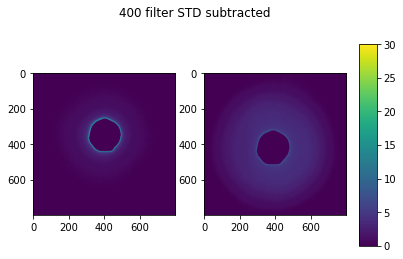

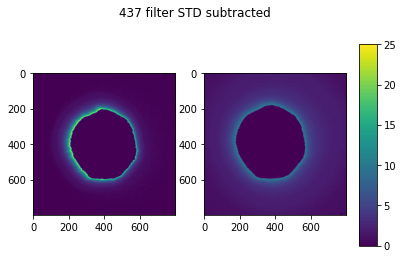

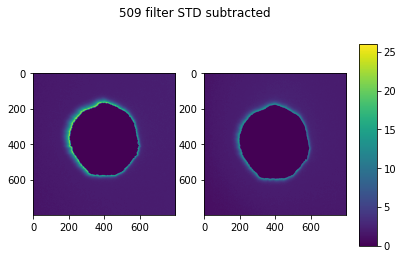

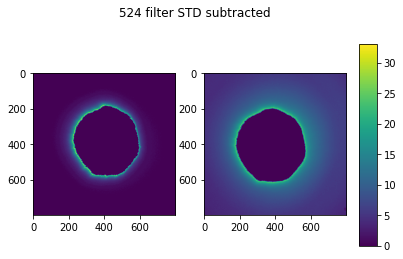

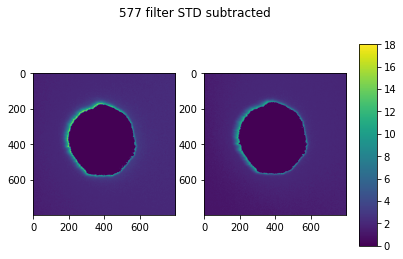

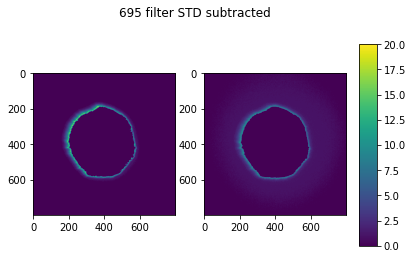

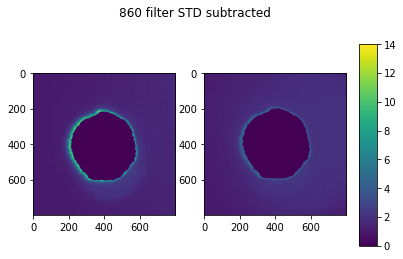

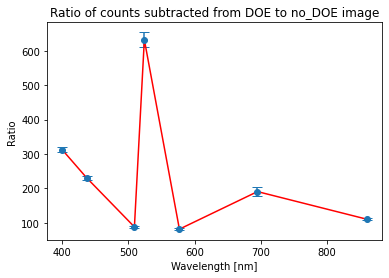

In [15]:
cwl = [400, 437,509,524,577,695,860]
trans = []
T_std = []

for i in range(len(cwl)):
    
    trans_3 = []
    
    for j in range(3):
        img_noDOE = crop_center(img.imread(f'trans_raw_data/cropped_{cwl[i]}n{j+1}.bmp'),800,800)
        img_DOE = crop_center(img.imread(f'trans_raw_data/cropped_{cwl[i]}d{j+1}.bmp'),800,800)
        
        NDcoords = np.where(img_noDOE >= np.std(img_noDOE),0,img_noDOE)
        Dcoords = np.where(img_DOE >= np.std(img_DOE),0,img_DOE)
        
        img_noDOE = NDcoords
        img_DOE = Dcoords
        DOE_sum = np.sum(img_DOE)
        noDOE_sum = np.sum(img_noDOE)
        T = DOE_sum / noDOE_sum*100
        trans_3.append(T)
        
    trans.append(np.average(trans_3))
    T_std.append(np.std(trans_3))
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    minmin = np.min([np.min(img_noDOE), np.min(img_DOE)])
    maxmax = np.max([np.max(img_noDOE), np.max(img_DOE)])
    
    im1 = axes[0].imshow(img_noDOE, vmin=minmin, vmax=maxmax,
                    cmap='viridis')
    im2 = axes[1].imshow(img_DOE, vmin=minmin, vmax=maxmax,
                    cmap='viridis')
    fig.suptitle(f'{cwl[i]} filter STD subtracted')
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im2, cax=cbar_ax)
    plt.show()


plt.errorbar(cwl,trans, yerr = T_std,fmt = 'o', capsize = 5)
trans_av = movingaverage(trans, 1)
plt.plot(cwl, trans_av,"r")
plt.title('Ratio of counts subtracted from DOE to no_DOE image')
plt.ylabel('Ratio')
plt.xlabel('Wavelength [nm]')
plt.show()